# Introdução Data Science - Ana Beatriz Macedo<img src="https://octocat-generator-assets.githubusercontent.com/my-octocat-1626096942740.png" width="324" height="324" align="right">
## Link para download: https://github.com/AnabeatrizMacedo241/DataScience-101
## Github: https://github.com/AnabeatrizMacedo241
## Linkedin: https://www.linkedin.com/in/ana-beatriz-oliveira-de-macedo-85b05b215/
![yellow-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Estatística em Python
#### Bibliotecas recomendadas para estatística: 
Python, NumPy, SciPy, Pandas, Matplotlib, Seaborn, math, statistics

In [63]:
import math
import statistics
import numpy as np
import scipy.stats

In [29]:
import pandas as pd
import re
dados = pd.read_csv('Dados-Estatisticos.csv', sep=';')
dados

,Id,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma
0,2,A,F,18,1.69,55.0,1,NAO
1,3,A,M,18,1.85,72.8,2,NAO
2,4,A,M,25,1.85,80.9,2,NAO
3,5,A,F,19,1.58,55.0,1,NAO
4,6,A,M,19,1.76,60.0,3,NAO
5,7,A,F,20,1.60,58.0,1,NAO
6,8,A,F,18,1.64,47.0,1,SIM
7,9,A,F,18,1.62,57.8,3,NAO
8,10,A,F,17,1.64,58.0,2,NAO


0. `.describe()` é utilizado para dar um 'resumo estatístico' de datasets. 
1. `count` é o número de informações por categoria.
2. `mean` é a média de cada coluna.
3. `std` é o Desvio padrão da coluna.
4. `min` é o menor número da coluna.
5. `25` o primeiro quarti. Representa os 25% mais baixos dos valores.
6. `50%` seria o segundo quartil. Representa os 50% mais baixos dos valores.
7. `75%` seria o terceiro quartil. Representa os 75% mais baixos dos valores.
8. `max` é o maior número da coluna.

In [30]:
dados.describe()

,Id,Idade,Alt,Peso,Filhos
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,6.000000,19.111111,1.692222,60.500000,1.777778
std,2.738613,2.368778,0.103776,10.187247,0.833333
min,2.000000,17.000000,1.580000,47.000000,1.000000
25%,4.000000,18.000000,1.620000,55.000000,1.000000
50%,6.000000,18.000000,1.640000,58.000000,2.000000
75%,8.000000,19.000000,1.760000,60.000000,2.000000
max,10.000000,25.000000,1.850000,80.900000,3.000000


In [65]:
dados['Alt'].mean() #Também podemos calcular individualmente

1.6922222222222223

In [72]:
dados.var() #Variância

Id          7.500000
Idade       5.611111
Alt         0.010769
Peso      103.780000
Filhos      0.694444
dtype: float64

`pstdev()` : Desvio padrão da população de dados.

`pvariance()` : Variância populacional dos dados.

`stdev()` : Desvio padrão da amostra de dados.

`variance()` : Variância de amostra de dados.

In [83]:
statistics.pstdev(dados['Peso'])

9.60462851384107

In [82]:
statistics.pvariance(dados['Alt'])

0.009572839506172843

In [84]:
statistics.stdev(dados['Alt'])

0.10377593384038733

In [85]:
statistics.variance(dados['Idade'])

5.611111111111112

In [90]:
#zscore() = (x - mean) / stdev
zscore=(x - 1.692222) / 0.10377593384038733
zscore

0   -0.021412
1    1.520372
2    1.520372
3   -1.081388
4    0.653119
5   -0.888665
6   -0.503219
7   -0.695942
8   -0.503219
Name: Alt, dtype: float64

In [92]:
#Calculando quantis
print(np.quantile(dados['Alt'], [0,0.25,0.5,0.75,1]))

[1.58 1.62 1.64 1.76 1.85]


In [94]:
print(dados.groupby('Idade')['Filhos'].agg([np.var, np.std]))

            var       std
Idade                    
17          NaN       NaN
18     0.916667  0.957427
19     2.000000  1.414214
20          NaN       NaN
25          NaN       NaN


In [95]:
filhos_por_idade = dados.groupby('Idade')['Filhos'].sum()
print(filhos_por_idade)

Idade
17    2
18    7
19    4
20    1
25    2
Name: Filhos, dtype: int64


In [97]:
#Calculando o primeiro e terceiro quartis e a Amplitude interquartil
q1 = np.quantile(filhos_por_idade, 0.25)
q3 = np.quantile(filhos_por_idade, 0.75)
amplitude = q3-q1
amplitude

2.0

In [99]:
#Calculando corte superior e inferior para outliers
superior = q3+1.5*amplitude
inferior = q1+1.5*amplitude
superior

7.0

In [100]:
inferior

5.0

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

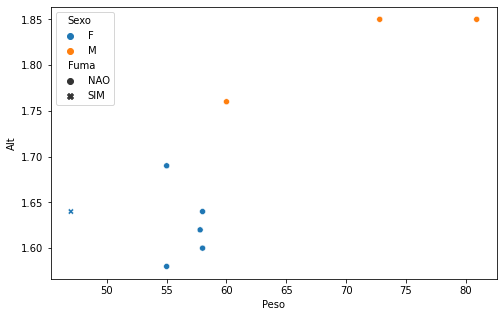

In [62]:
plt.figure(figsize=(8,5))
fig1 = sns.scatterplot(data=dados, x='Peso', y='Alt', hue='Sexo', style='Fuma')

<AxesSubplot:xlabel='Fuma', ylabel='Count'>

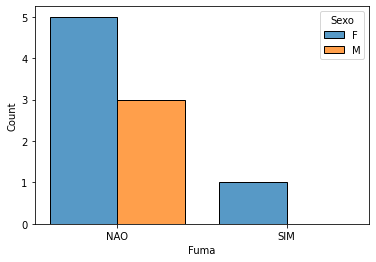

In [110]:
sns.histplot(data=dados, x='Fuma', hue='Sexo', multiple='dodge', shrink=.8)

In [113]:
#Calculando o IMC
imc = dados['Peso'] / dados['Alt']**2
imc

0    19.257029
1    21.271001
2    23.637692
3    22.031726
4    19.369835
5    22.656250
6    17.474717
7    22.024082
8    21.564545
dtype: float64

In [120]:
dados['IMC']=imc
dados

,Id,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma,IMC
0,2,A,F,18,1.69,55.0,1,NAO,19.257029
1,3,A,M,18,1.85,72.8,2,NAO,21.271001
2,4,A,M,25,1.85,80.9,2,NAO,23.637692
3,5,A,F,19,1.58,55.0,1,NAO,22.031726
4,6,A,M,19,1.76,60.0,3,NAO,19.369835
5,7,A,F,20,1.60,58.0,1,NAO,22.656250
6,8,A,F,18,1.64,47.0,1,SIM,17.474717
7,9,A,F,18,1.62,57.8,3,NAO,22.024082
8,10,A,F,17,1.64,58.0,2,NAO,21.564545


In [131]:
for imc in dados['IMC']:
    if imc < 16:
        print("Magreza grave")
    elif imc < 17:
        print("Magreza moderada")
    elif imc < 18.5:
        print("Magreza leve")
    elif imc < 25:
        print("Saudável")
    else:
        print("Sobrepeso")

Saudável
Saudável
Saudável
Saudável
Saudável
Saudável
Magreza leve
Saudável
Saudável


### Até a próxima aula e bons estudos!
## Ana Beatriz Macedo
![blue-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)